In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Data for each model (scaled to 50 examples while maintaining proportions)
# Format: rows are predicted, columns are actual
gemini_data = np.array([
    [7, 0, 0, 0],
    [0, 31, 1, 0],
    [0, 0, 5, 0],
    [0, 0, 0, 6]
])

claude_data = np.array([
    [7, 0, 0, 0, 0],
    [0, 31, 0, 0, 1],
    [0, 0, 5, 0, 0],
    [0, 0, 0, 6, 0]
])

gpt4_data = np.array([
    [7, 0, 0, 0, 0],
    [0, 31, 0, 0, 1],
    [0, 0, 5, 0, 0],
    [0, 0, 0, 6, 0]
])

# Labels
labels = ['0', '1', '2', '3']
labels_with_nei = ['0', '1', '2', '3', 'NEI']

# Custom colormap for different cell types
colors = ['#FFFFFF', '#D4E6FF', '#FFE6D4', '#FFCDD2']
cmap = sns.color_palette(colors)

# Plot Gemini Matrix
sns.heatmap(gemini_data, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels, ax=ax1, cbar=False)
ax1.set_title('Gemini-1.5 Flash')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')

# Plot Claude Matrix
sns.heatmap(claude_data, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels_with_nei, yticklabels=labels, ax=ax2, cbar=False)
ax2.set_title('Claude 3.5 Sonnet')
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')

# Plot GPT-4 Matrix
sns.heatmap(gpt4_data, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels_with_nei, yticklabels=labels, ax=ax3, cbar=False)
ax3.set_title('GPT-4o')
ax3.set_xlabel('Actual')
ax3.set_ylabel('Predicted')

# Add overall title
plt.suptitle('Confusion Matrices by Model', fontsize=16, y=1.05)

# Adjust layout
plt.tight_layout()

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#D4E6FF', label='Correct Predictions'),
    Patch(facecolor='#FFE6D4', label='Not Enough Information'),
    Patch(facecolor='#FFCDD2', label='Incorrect Predictions')
]
fig.legend(handles=legend_elements, loc='center', bbox_to_anchor=(0.5, -0.1),
          ncol=3, frameon=False)

# Save the figure
plt.savefig('confusion_matrices.pdf', bbox_inches='tight', dpi=300)
plt.close()

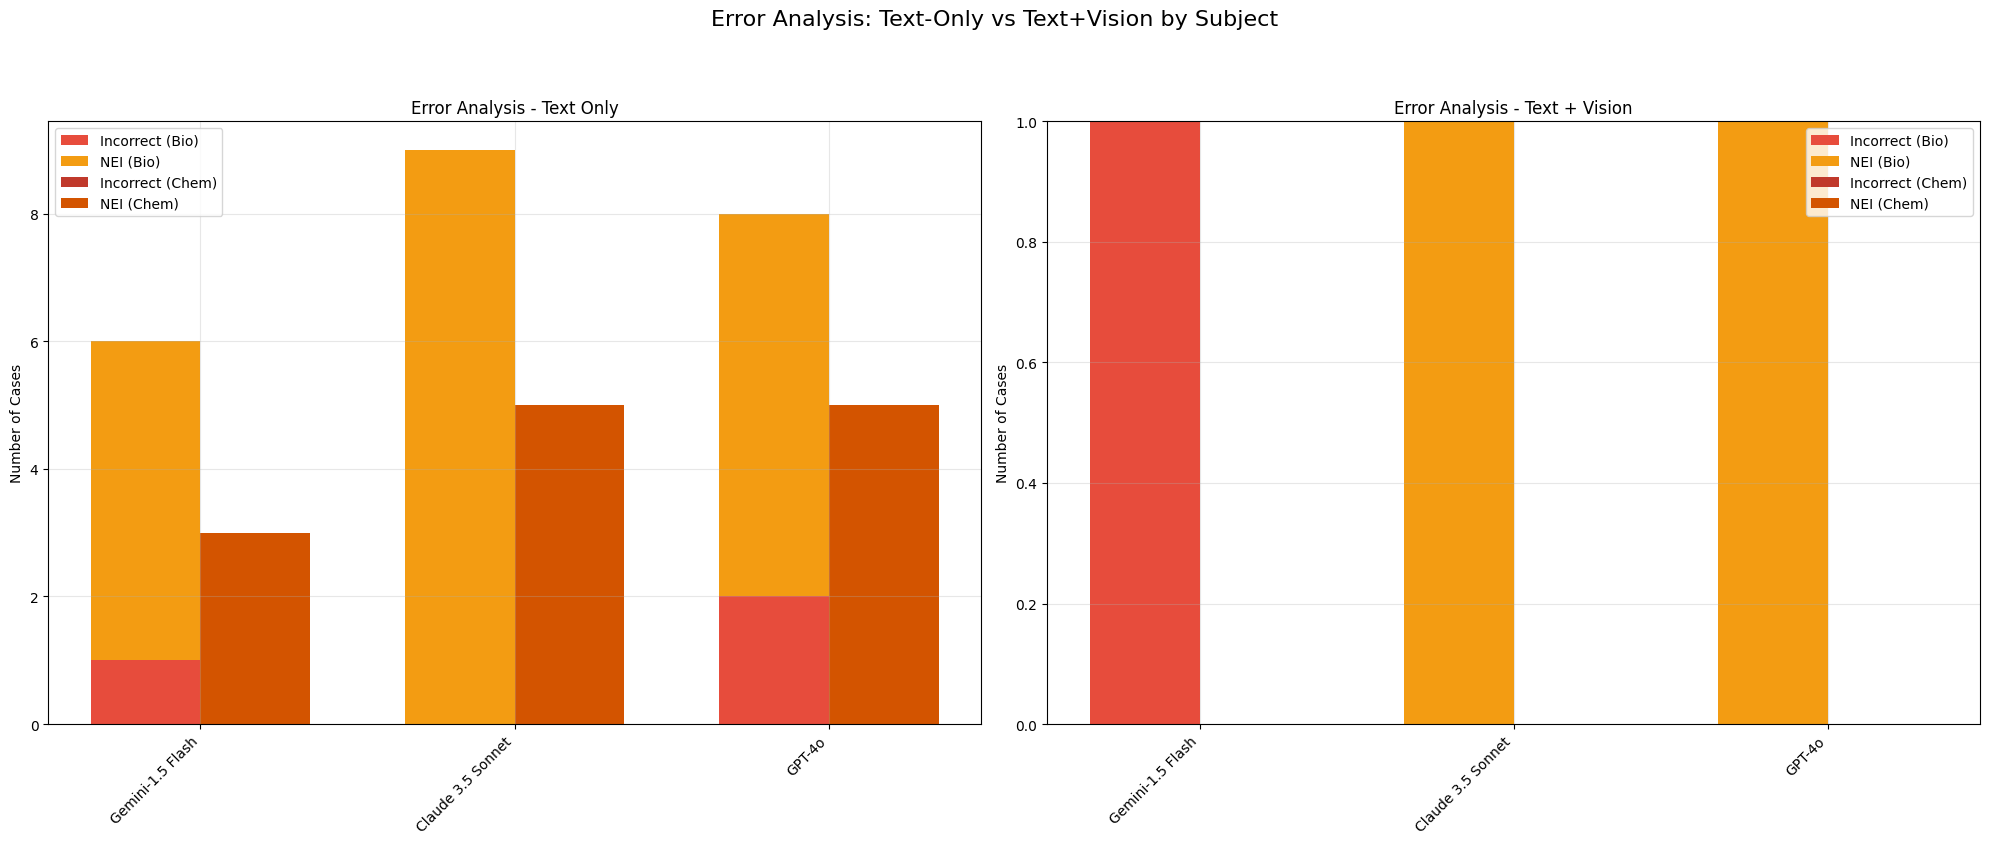

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data for Text-Only Performance
models = ['Gemini-1.5 Flash', 'Claude 3.5 Sonnet', 'GPT-4o']

# Biology vs Chemistry - Text Only
text_only_bio = {
    'Gemini-1.5 Flash': 70.0,
    'Claude 3.5 Sonnet': 55.0,
    'GPT-4o': 60.0
}

text_only_chem = {
    'Gemini-1.5 Flash': 70.0,
    'Claude 3.5 Sonnet': 50.0,
    'GPT-4o': 50.0
}

# Biology vs Chemistry - Text + Vision
text_vision_bio = {
    'Gemini-1.5 Flash': 95.0,
    'Claude 3.5 Sonnet': 95.0,
    'GPT-4o': 95.0
}

text_vision_chem = {
    'Gemini-1.5 Flash': 100.0,
    'Claude 3.5 Sonnet': 100.0,
    'GPT-4o': 100.0
}

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Bar width and positions
bar_width = 0.35
index = np.arange(len(models))

# Text-Only Plot
bars1 = ax1.bar(index, [text_only_bio[m] for m in models], bar_width, 
                label='Biology', color='#2ecc71')
bars2 = ax1.bar(index + bar_width, [text_only_chem[m] for m in models], 
                bar_width, label='Chemistry', color='#3498db')

ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Text-Only Performance by Subject')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 100)

# Add value labels for Text-Only
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)

# Text + Vision Plot
bars3 = ax2.bar(index, [text_vision_bio[m] for m in models], bar_width, 
                label='Biology', color='#2ecc71')
bars4 = ax2.bar(index + bar_width, [text_vision_chem[m] for m in models], 
                bar_width, label='Chemistry', color='#3498db')

ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Text + Vision Performance by Subject')
ax2.set_xticks(index + bar_width / 2)
ax2.set_xticklabels(models, rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 100)

add_value_labels(bars3)
add_value_labels(bars4)

# Adjust layout
plt.suptitle('Model Performance Comparison: Text-Only vs Text+Vision by Subject', fontsize=16, y=1.05)
plt.tight_layout()

# Save the figure
plt.savefig('subject_performance_comparison.pdf', bbox_inches='tight', dpi=300)
plt.close()

# Now create error analysis visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Error Analysis Data - Text Only
error_data_text = {
    'Model': ['Gemini-1.5 Flash', 'Gemini-1.5 Flash', 
              'Claude 3.5 Sonnet', 'Claude 3.5 Sonnet',
              'GPT-4o', 'GPT-4o'],
    'Subject': ['Biology', 'Chemistry', 'Biology', 'Chemistry', 'Biology', 'Chemistry'],
    'Incorrect': [1, 0, 0, 0, 2, 0],
    'NEI': [5, 3, 9, 5, 6, 5]
}

# Error Analysis Data - Text + Vision
error_data_vision = {
    'Model': ['Gemini-1.5 Flash', 'Gemini-1.5 Flash', 
              'Claude 3.5 Sonnet', 'Claude 3.5 Sonnet',
              'GPT-4o', 'GPT-4o'],
    'Subject': ['Biology', 'Chemistry', 'Biology', 'Chemistry', 'Biology', 'Chemistry'],
    'Incorrect': [1, 0, 0, 0, 0, 0],
    'NEI': [0, 0, 1, 0, 1, 0]
}

# Plot Error Analysis - Text Only
for i, model in enumerate(['Gemini-1.5 Flash', 'Claude 3.5 Sonnet', 'GPT-4o']):
    mask = np.array(error_data_text['Model']) == model
    bio_mask = mask & (np.array(error_data_text['Subject']) == 'Biology')
    chem_mask = mask & (np.array(error_data_text['Subject']) == 'Chemistry')
    
    x = i
    width = 0.35
    
    # Biology
    ax1.bar(x - width/2, np.array(error_data_text['Incorrect'])[bio_mask], 
            width, label='Incorrect (Bio)' if i == 0 else "", color='#e74c3c')
    ax1.bar(x - width/2, np.array(error_data_text['NEI'])[bio_mask], 
            width, bottom=np.array(error_data_text['Incorrect'])[bio_mask],
            label='NEI (Bio)' if i == 0 else "", color='#f39c12')
    
    # Chemistry
    ax1.bar(x + width/2, np.array(error_data_text['Incorrect'])[chem_mask], 
            width, label='Incorrect (Chem)' if i == 0 else "", color='#c0392b')
    ax1.bar(x + width/2, np.array(error_data_text['NEI'])[chem_mask], 
            width, bottom=np.array(error_data_text['Incorrect'])[chem_mask],
            label='NEI (Chem)' if i == 0 else "", color='#d35400')

ax1.set_ylabel('Number of Cases')
ax1.set_title('Error Analysis - Text Only')
ax1.set_xticks(range(len(models)))
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot Error Analysis - Text + Vision
for i, model in enumerate(['Gemini-1.5 Flash', 'Claude 3.5 Sonnet', 'GPT-4o']):
    mask = np.array(error_data_vision['Model']) == model
    bio_mask = mask & (np.array(error_data_vision['Subject']) == 'Biology')
    chem_mask = mask & (np.array(error_data_vision['Subject']) == 'Chemistry')
    
    x = i
    width = 0.35
    
    # Biology
    ax2.bar(x - width/2, np.array(error_data_vision['Incorrect'])[bio_mask], 
            width, label='Incorrect (Bio)' if i == 0 else "", color='#e74c3c')
    ax2.bar(x - width/2, np.array(error_data_vision['NEI'])[bio_mask], 
            width, bottom=np.array(error_data_vision['Incorrect'])[bio_mask],
            label='NEI (Bio)' if i == 0 else "", color='#f39c12')
    
    # Chemistry
    ax2.bar(x + width/2, np.array(error_data_vision['Incorrect'])[chem_mask], 
            width, label='Incorrect (Chem)' if i == 0 else "", color='#c0392b')
    ax2.bar(x + width/2, np.array(error_data_vision['NEI'])[chem_mask], 
            width, bottom=np.array(error_data_vision['Incorrect'])[chem_mask],
            label='NEI (Chem)' if i == 0 else "", color='#d35400')

ax2.set_ylabel('Number of Cases')
ax2.set_title('Error Analysis - Text + Vision')
ax2.set_xticks(range(len(models)))
ax2.set_xticklabels(models, rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.suptitle('Error Analysis: Text-Only vs Text+Vision by Subject', fontsize=16, y=1.05)
plt.tight_layout()

# Save the error analysis figure
#plt.savefig('error_analysis_comparison.pdf', bbox_inches='tight', dpi=300)
plt.show()
plt.close()#

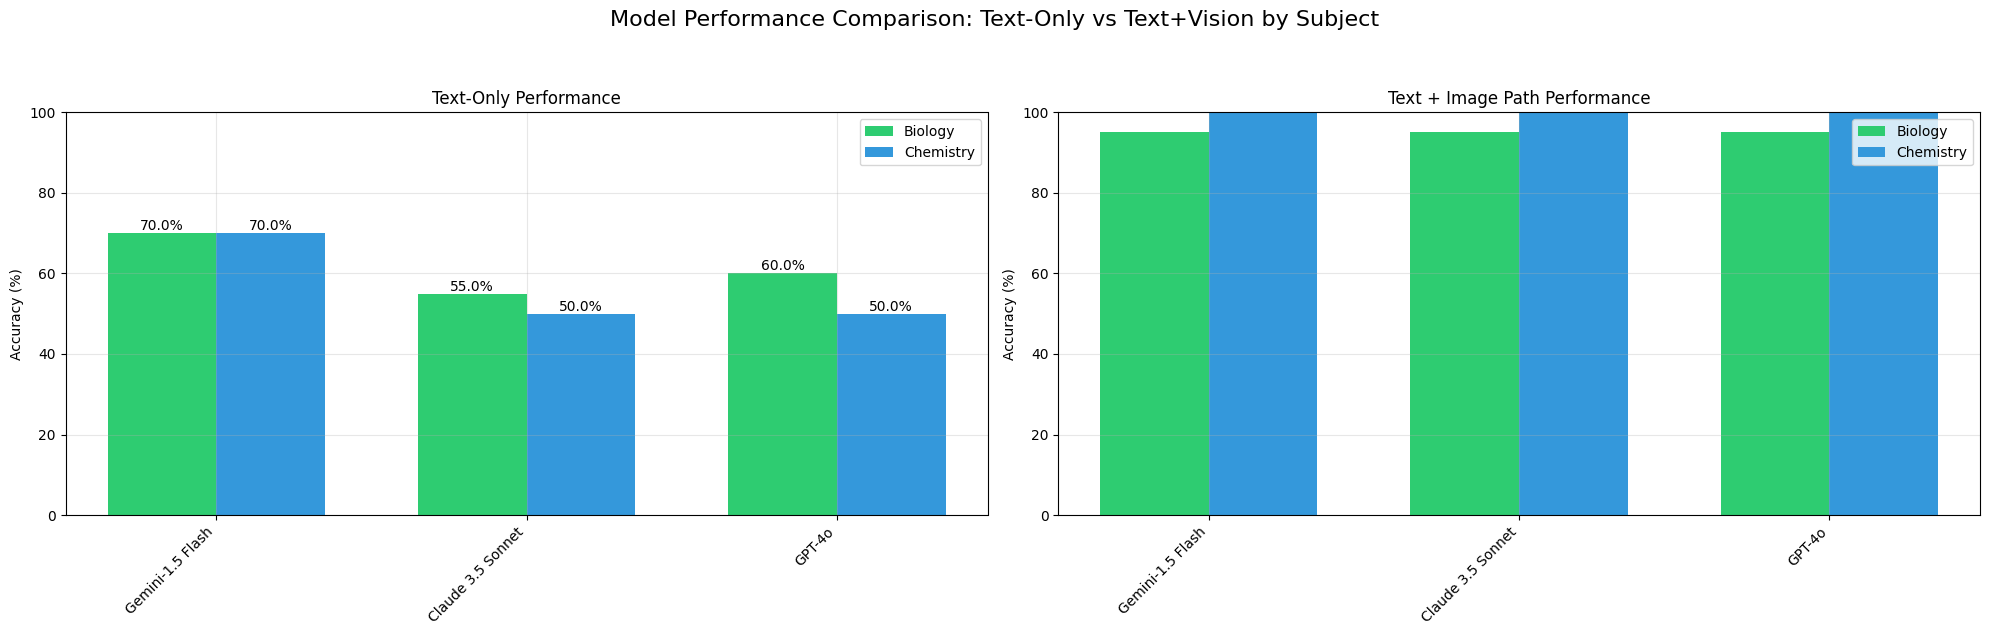

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Data for Text-Only Performance
models = ['Gemini-1.5 Flash', 'Claude 3.5 Sonnet', 'GPT-4o']

# Biology vs Chemistry - Text Only
text_only_bio = {
    'Gemini-1.5 Flash': 70.0,
    'Claude 3.5 Sonnet': 55.0,
    'GPT-4o': 60.0
}

text_only_chem = {
    'Gemini-1.5 Flash': 70.0,
    'Claude 3.5 Sonnet': 50.0,
    'GPT-4o': 50.0
}

# Biology vs Chemistry - Text + Vision
text_vision_bio = {
    'Gemini-1.5 Flash': 95.0,
    'Claude 3.5 Sonnet': 95.0,
    'GPT-4o': 95.0
}

text_vision_chem = {
    'Gemini-1.5 Flash': 100.0,
    'Claude 3.5 Sonnet': 100.0,
    'GPT-4o': 100.0
}

# --- Combined Plot: Text-Only and Text+Vision Accuracy ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6)) # 1 row, 2 columns

# Bar width and positions
bar_width = 0.35
index = np.arange(len(models))

# Text-Only Plot (ax1)
bars1 = ax1.bar(index, [text_only_bio[m] for m in models], bar_width, 
                label='Biology', color='#2ecc71')
bars2 = ax1.bar(index + bar_width, [text_only_chem[m] for m in models], 
                bar_width, label='Chemistry', color='#3498db')

ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Text-Only Performance')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 100)

# Add value labels for Text-Only
def add_value_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom')

add_value_labels(bars1, ax1)
add_value_labels(bars2, ax1)


# Text + Vision Plot (ax2)
bars3 = ax2.bar(index, [text_vision_bio[m] for m in models], bar_width, 
                label='Biology', color='#2ecc71')
bars4 = ax2.bar(index + bar_width, [text_vision_chem[m] for m in models], 
                bar_width, label='Chemistry', color='#3498db')

ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Text + Image Path Performance')
ax2.set_xticks(index + bar_width / 2)
ax2.set_xticklabels(models, rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 100)

#add_value_labels(bars3, ax2)
#add_value_labels(bars4, ax2)

plt.suptitle('Model Performance Comparison: Text-Only vs Text+Vision by Subject', fontsize=16, y=1.05)
plt.tight_layout()

plt.savefig("results_bio_vs_chem.pdf", bbox_inches='tight', dpi=300)
plt.show()
plt.close()